In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# 애플, 구글, 아마존의 주가를 예측

aapl = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'
goog = os.getenv('HOME') + '/aiffel/stock_prediction/data/GOOG.csv'
amzn = os.getenv('HOME') + '/aiffel/stock_prediction/data/AMZN.csv'

apple = pd.read_csv(aapl, index_col='Date', parse_dates=True)
google = pd.read_csv(goog, index_col='Date', parse_dates=True)
amazon = pd.read_csv(amzn, index_col='Date', parse_dates=True)

ts1 = apple['Close']
ts2 = google['Close']
ts3 = amazon['Close']

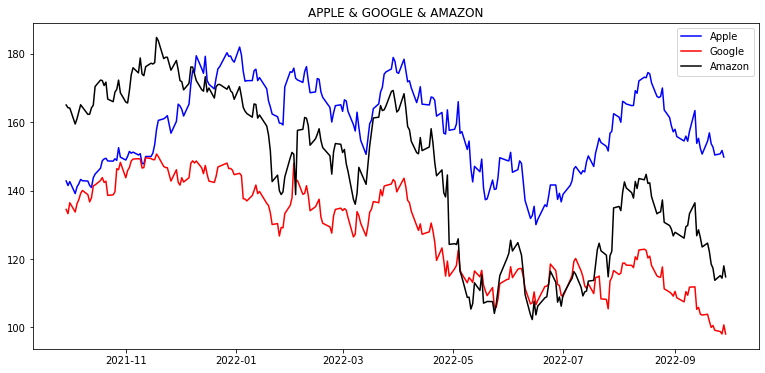

In [49]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6
APPLE = plt.plot(ts1, color='blue',label='Apple')    
GOOGLE = plt.plot(ts2, color='red', label='Google')
AMAZON = plt.plot(ts3, color='black', label='Amazon')
plt.legend(loc='best')
plt.title('APPLE & GOOGLE & AMAZON')
plt.show(block=False)   # 시계열의 시각화를 통한 안정성 여부 확인

In [50]:
# 결측치 처리

ts1 = ts1.interpolate(method='time')
ts2 = ts2.interpolate(method='time')
ts3 = ts3.interpolate(method='time')

In [51]:
# 정성적 그래프 분석을 위한 함수 선언

def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

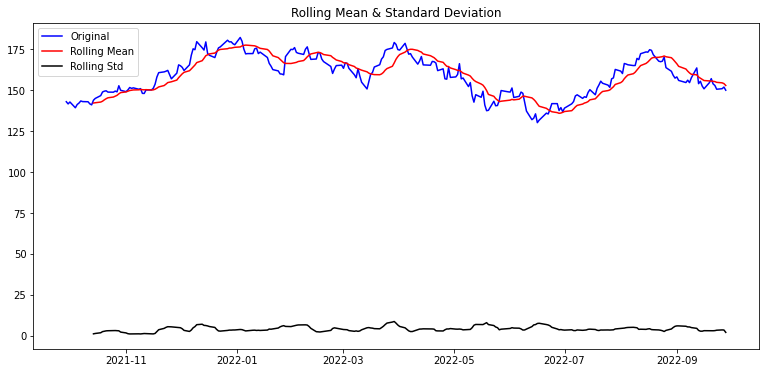

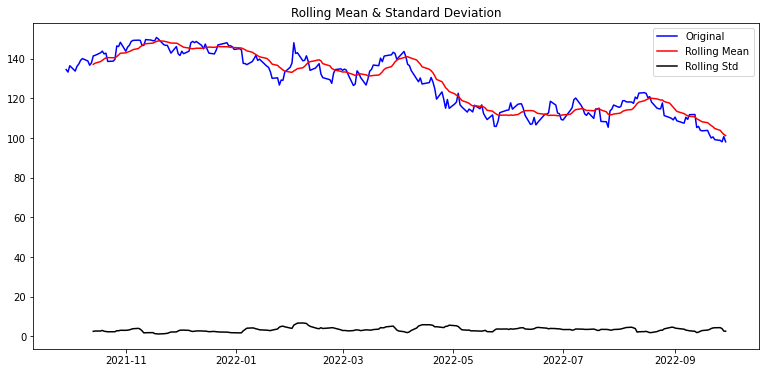

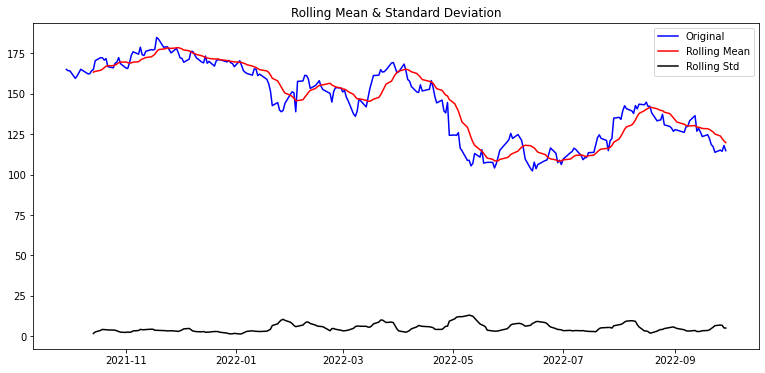

In [52]:
# 정성적 그래프 분석

plot_rolling_statistics(ts1, window=12)
plot_rolling_statistics(ts2, window=12)
plot_rolling_statistics(ts3, window=12)

## 세 기업의 주가는 안정적이라고 결론을 내리기에는 힘들어보이므로 좀 더 통계적인 접근이 필요해보인다.

In [22]:
# 정량적 Augmented Dicky-Fuller Test를 위한 함수 선언

from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [28]:
print('Apple의 Augmented Dicky-Fuller Test')
augmented_dickey_fuller_test(ts1)
print('\nGoogle의 Augmented Dicky-Fuller Test')
augmented_dickey_fuller_test(ts2)
print('\nAmazon의 Augmented Dicky-Fuller Test')
augmented_dickey_fuller_test(ts3)

Apple의 Augmented Dicky-Fuller Test
Results of Dickey-Fuller Test:
Test Statistic                  -2.161911
p-value                          0.220359
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64

Google의 Augmented Dicky-Fuller Test
Results of Dickey-Fuller Test:
Test Statistic                  -0.786555
p-value                          0.823039
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64

Amazon의 Augmented Dicky-Fuller Test
Results of Dickey-Fuller Test:
Test Statistic                  -1.177297
p-value                          0.683285
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Val

## 세 시계열 data 모두 p-value가 상당히 높으므로 가공이 필요해보인다.

In [29]:
# 로그 변환

ts1_log = np.log(ts1)
ts2_log = np.log(ts2)
ts3_log = np.log(ts3)

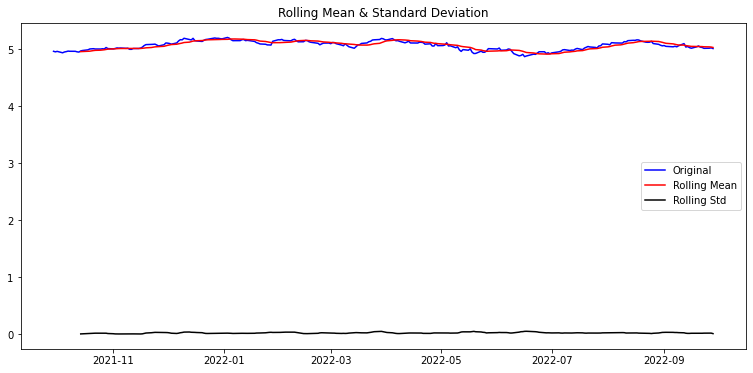

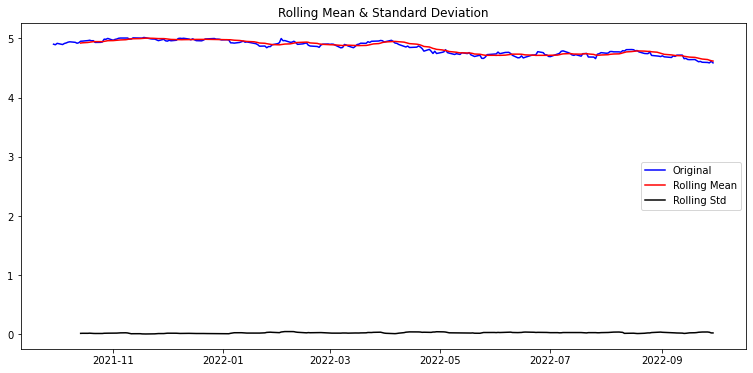

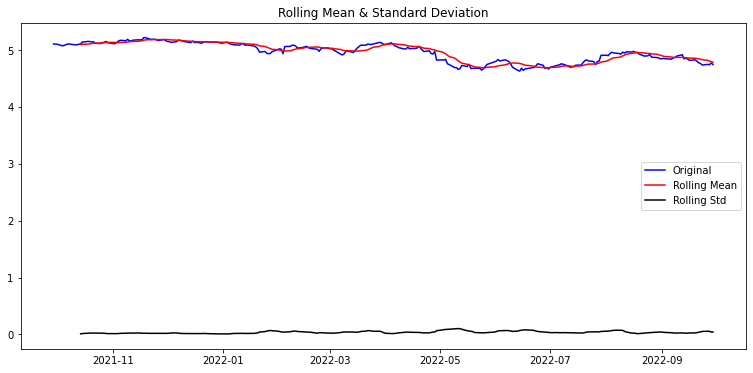

In [30]:
# 로그 변환된 데이터에 대한 정성적 그래프 분석

plot_rolling_statistics(ts1_log, window=12)
plot_rolling_statistics(ts2_log, window=12)
plot_rolling_statistics(ts3_log, window=12)

In [53]:
print('로그 변환된 Apple의 Augmented Dicky-Fuller Test')
augmented_dickey_fuller_test(ts1_log)
print('\n로그 변환된 Google의 Augmented Dicky-Fuller Test')
augmented_dickey_fuller_test(ts2_log)
print('\n로그 변환된 Amazon의 Augmented Dicky-Fuller Test')
augmented_dickey_fuller_test(ts3_log)

로그 변환된 Apple의 Augmented Dicky-Fuller Test
Results of Dickey-Fuller Test:
Test Statistic                  -2.163789
p-value                          0.219649
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64

로그 변환된 Google의 Augmented Dicky-Fuller Test
Results of Dickey-Fuller Test:
Test Statistic                  -0.686416
p-value                          0.850237
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64

로그 변환된 Amazon의 Augmented Dicky-Fuller Test
Results of Dickey-Fuller Test:
Test Statistic                  -1.199170
p-value                          0.673953
#Lags Used                       0.000000
Number of Observations Used    25

## 로그변환의 효과는 미미했을뿐더러 Google의 경우에는 오히려 p-value가 커졌다.

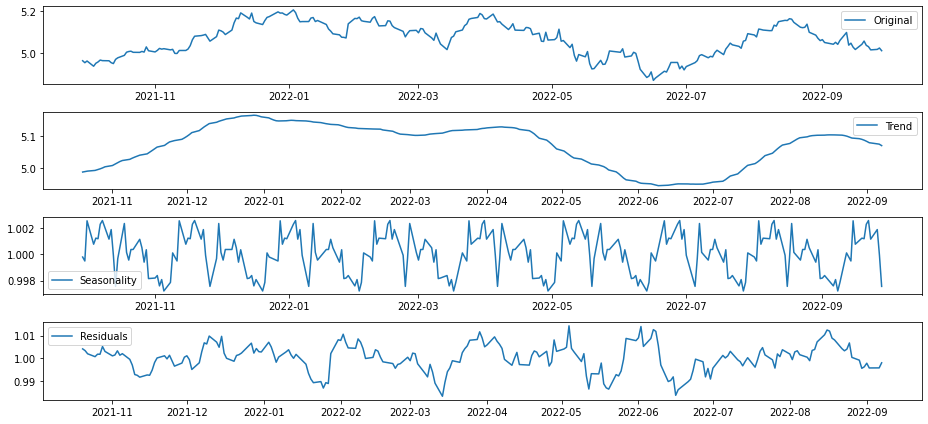

In [54]:
# Apple Data의 시계열 분해 (Time Series Decomposition)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts1_log, model='multiplicative', period = 30) 

trend1 = decomposition.trend
seasonal1 = decomposition.seasonal
residual1 = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend1, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal1,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual1, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

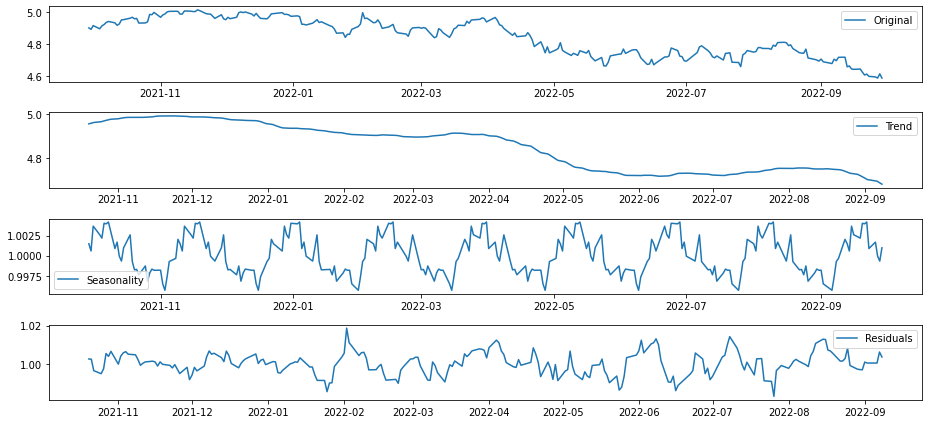

In [55]:
# Google Data의 시계열 분해 (Time Series Decomposition)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts2_log, model='multiplicative', period = 30) 

trend2 = decomposition.trend
seasonal2 = decomposition.seasonal
residual2 = decomposition.resid

plt.subplot(411)
plt.plot(ts2_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend2, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal2,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual2, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

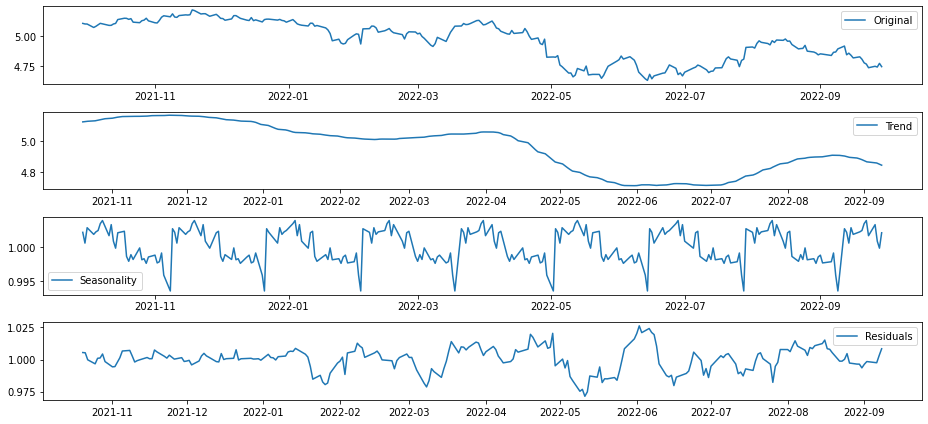

In [56]:
# Amazon Data의 시계열 분해 (Time Series Decomposition)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts3_log, model='multiplicative', period = 30) 

trend3 = decomposition.trend
seasonal3 = decomposition.seasonal
residual3 = decomposition.resid

plt.subplot(411)
plt.plot(ts3_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend3, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal3,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual3, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [57]:
# Apple Data의 Residual 안정성 확인

residual1.dropna(inplace=True)
augmented_dickey_fuller_test(residual1)

Results of Dickey-Fuller Test:
Test Statistic                  -5.000214
p-value                          0.000022
#Lags Used                      11.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


In [58]:
# Google Data의 Residual 안정성 확인

residual2.dropna(inplace=True)
augmented_dickey_fuller_test(residual2)

Results of Dickey-Fuller Test:
Test Statistic                -6.222821e+00
p-value                        5.173563e-08
#Lags Used                     2.000000e+00
Number of Observations Used    2.200000e+02
Critical Value (1%)           -3.460428e+00
Critical Value (5%)           -2.874769e+00
Critical Value (10%)          -2.573821e+00
dtype: float64


In [59]:
# Amazon Data의 Residual 안정성 확인

residual3.dropna(inplace=True)
augmented_dickey_fuller_test(residual3)

Results of Dickey-Fuller Test:
Test Statistic                  -5.258225
p-value                          0.000007
#Lags Used                       2.000000
Number of Observations Used    220.000000
Critical Value (1%)             -3.460428
Critical Value (5%)             -2.874769
Critical Value (10%)            -2.573821
dtype: float64


## 세 기업의 Residual 안정성을 확인한 결과 p-value가 모두 충분히 낮은 값으로 떨어졌다.

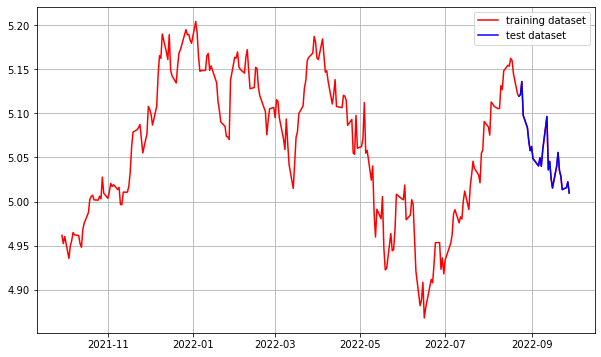

In [71]:
# Apple Data의 학습, 테스트 데이터 분리

train_data1, test_data1 = ts1_log[:int(len(ts1_log)*0.9)], ts1_log[int(len(ts1_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts1_log, c='r', label='training dataset')
plt.plot(test_data1, c='b', label='test dataset')
plt.legend()

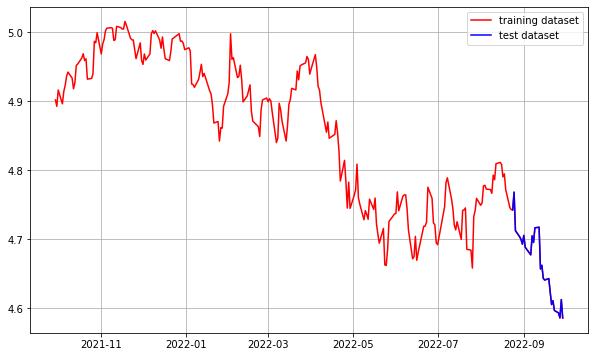

In [70]:
# Google Data의 학습, 테스트 데이터 분리

train_data2, test_data2 = ts2_log[:int(len(ts2_log)*0.9)], ts2_log[int(len(ts2_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts2_log, c='r', label='training dataset')
plt.plot(test_data2, c='b', label='test dataset')
plt.legend()

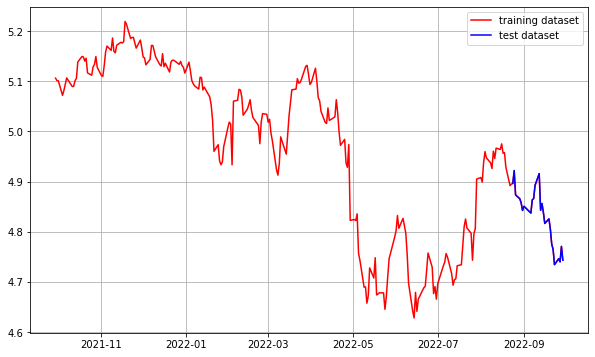

In [72]:
# Amazon Data의 학습, 테스트 데이터 분리

train_data3, test_data3 = ts3_log[:int(len(ts3_log)*0.9)], ts3_log[int(len(ts3_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts3_log, c='r', label='training dataset')
plt.plot(test_data3, c='b', label='test dataset')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


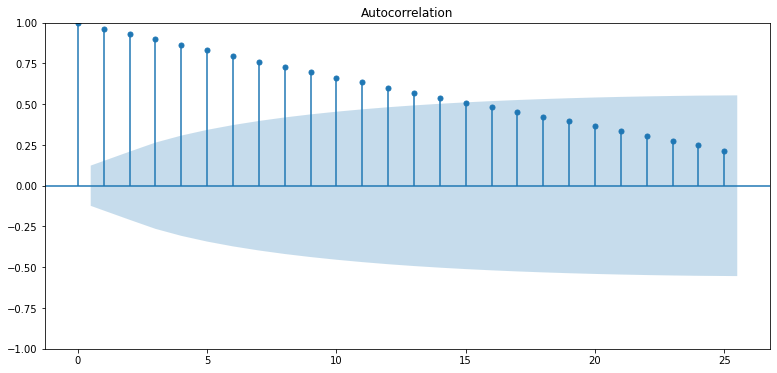

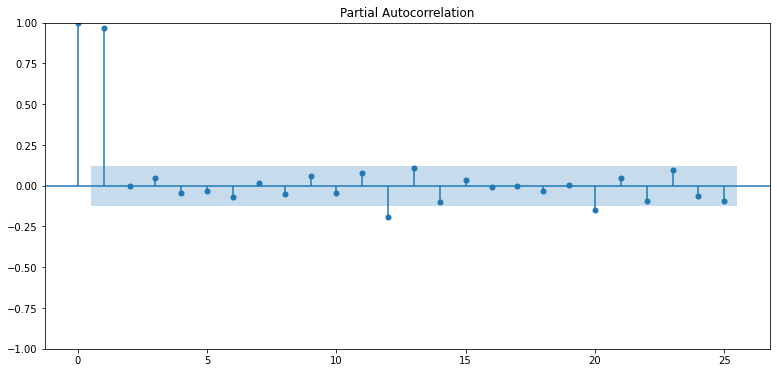

In [63]:
# Apple Data의 ACF, PACF 그려보기 -> p,q 구하기

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts1_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts1_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


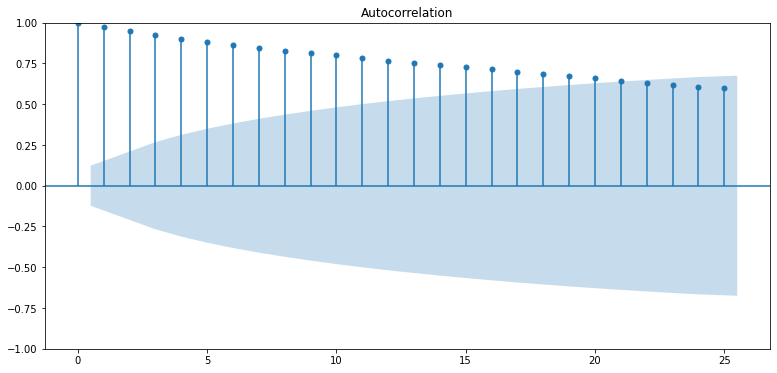

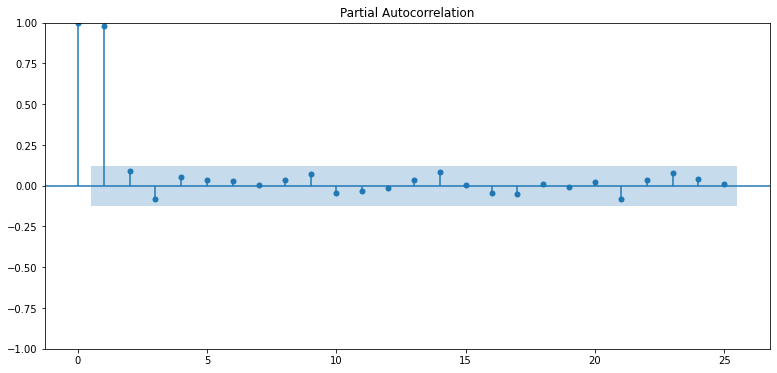

In [64]:
# Google Data의 ACF, PACF 그려보기 -> p,q 구하기

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts2_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts2_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


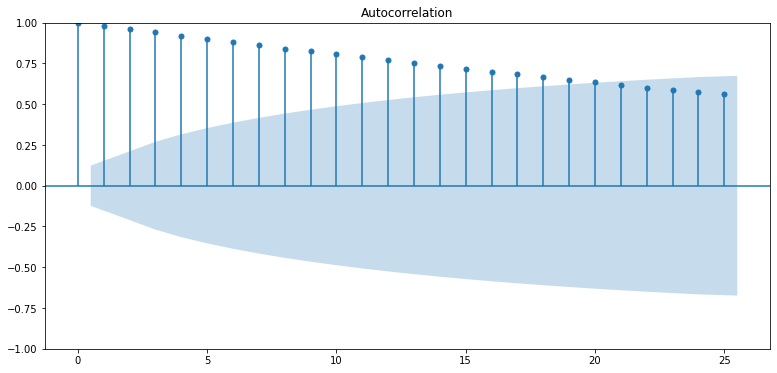

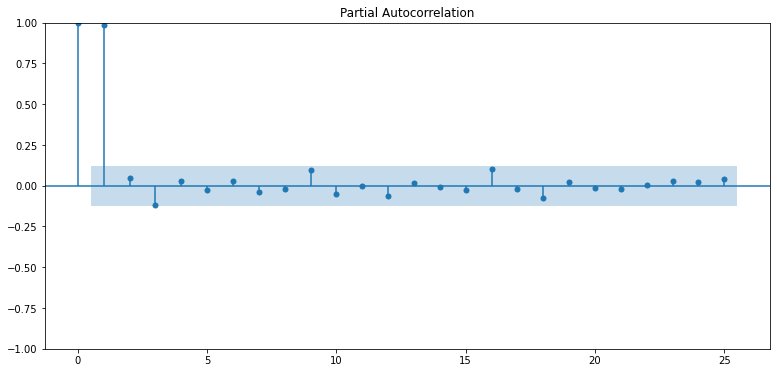

In [65]:
# Amazon Data의 ACF, PACF 그려보기 -> p,q 구하기

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts3_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts3_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

## 세 기업의 data 모두 PACF 그래프에서 p가 2이상인 구간에서 PACF가 0에 급격히 가까워지므로 p=1, q=0이 적합해보인다.

Results of Dickey-Fuller Test:
Test Statistic                -1.605511e+01
p-value                        5.718543e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.956005e+00
p-value                        3.036156e-12
#Lags Used                     1.100000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


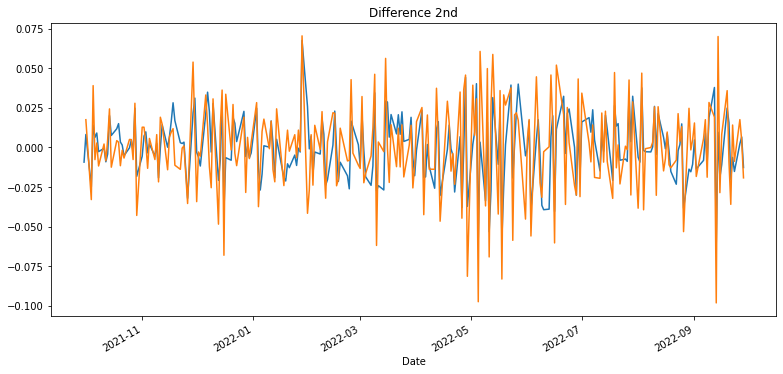

In [67]:
# Apple Data의 차분 구하기

diff_1_1 = ts1_log.diff(periods=1).iloc[1:]
diff_1_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1_1)

# 혹시 필요한 경우 2차 차분 구하기

diff_1_2 = diff_1_1.diff(periods=1).iloc[1:]
diff_1_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_1_2)

Results of Dickey-Fuller Test:
Test Statistic                -1.716326e+01
p-value                        6.819558e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.674372e+00
p-value                        1.562954e-11
#Lags Used                     1.400000e+01
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


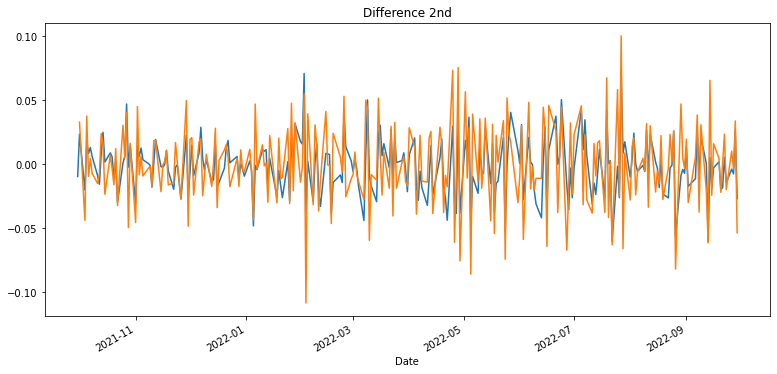

In [68]:
# Google Data의 차분 구하기

diff_2_1 = ts2_log.diff(periods=1).iloc[1:]
diff_2_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_2_1)

# 혹시 필요한 경우 2차 차분 구하기

diff_2_2 = diff_2_1.diff(periods=1).iloc[1:]
diff_2_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2_2)

Results of Dickey-Fuller Test:
Test Statistic                -1.625787e+01
p-value                        3.590617e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.934622e+00
p-value                        3.439914e-12
#Lags Used                     1.100000e+01
Number of Observations Used    2.390000e+02
Critical Value (1%)           -3.458011e+00
Critical Value (5%)           -2.873710e+00
Critical Value (10%)          -2.573256e+00
dtype: float64


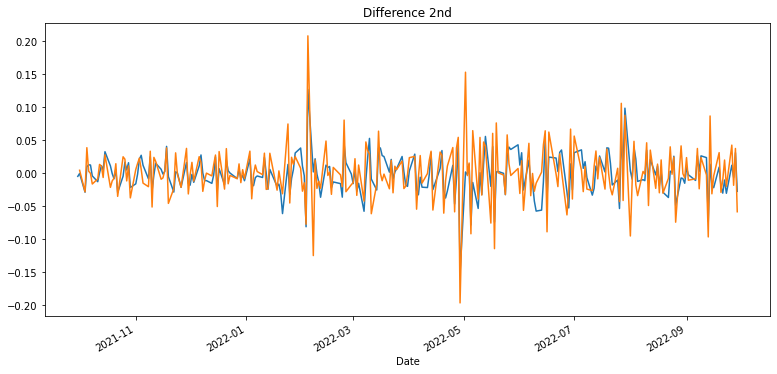

In [69]:
# Amazon Data의 차분 구하기

diff_3_1 = ts3_log.diff(periods=1).iloc[1:]
diff_3_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_3_1)

# 혹시 필요한 경우 2차 차분 구하기

diff_3_2 = diff_3_1.diff(periods=1).iloc[1:]
diff_3_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_3_2)

## p=1, q=0, d=2로 설정후 model 훈련 및 예측

In [76]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model1 = ARIMA(train_data1, order=(1, 2, 0))  
fitted_m1 = model1.fit()
model2 = ARIMA(train_data2, order=(1, 2, 0))  
fitted_m2 = model2.fit() 
model3 = ARIMA(train_data3, order=(1, 2, 0))  
fitted_m3 = model3.fit() 

print(fitted_m1.summary())
print(fitted_m2.summary())
print(fitted_m3.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 511.105
Date:                Fri, 30 Sep 2022   AIC                          -1018.210
Time:                        06:18:30   BIC                          -1011.386
Sample:                             0   HQIC                         -1015.455
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4687      0.058     -8.050      0.000      -0.583      -0.355
sigma2         0.0006   5.27e-05     11.566      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   6.20   Jarque-

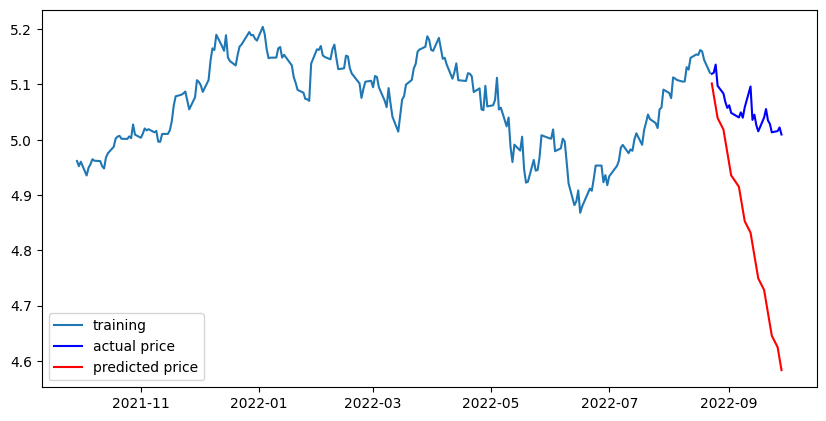

In [78]:
# Apple Data에 대한 예측
fc1 = fitted_m1.forecast(len(test_data1), alpha=0.05)  # 95% conf
fc1 = np.array(fc1)

# Make as pandas series
fc1_series = pd.Series(fc1, index=test_data1.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data1, label='training')
plt.plot(test_data1, c='b', label='actual price')
plt.plot(fc1_series, c='r',label='predicted price')
plt.legend()
plt.show()

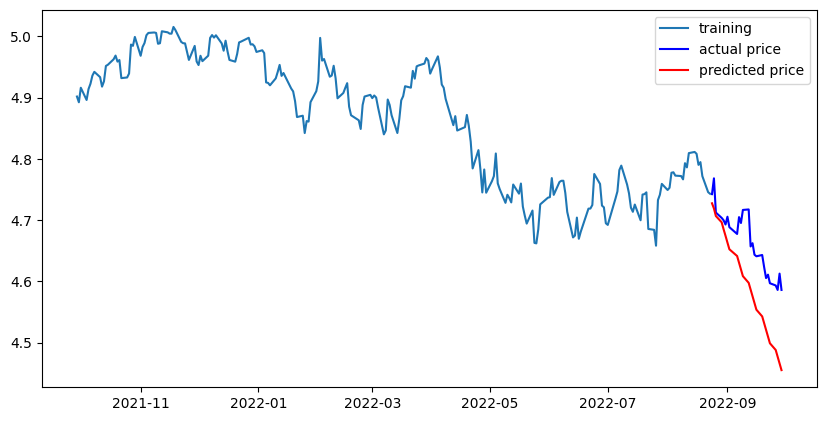

In [79]:
# Google Data에 대한 예측
fc2 = fitted_m2.forecast(len(test_data2), alpha=0.05)  # 95% conf
fc2 = np.array(fc2)

# Make as pandas series
fc2_series = pd.Series(fc2, index=test_data2.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data2, label='training')
plt.plot(test_data2, c='b', label='actual price')
plt.plot(fc2_series, c='r',label='predicted price')
plt.legend()
plt.show()

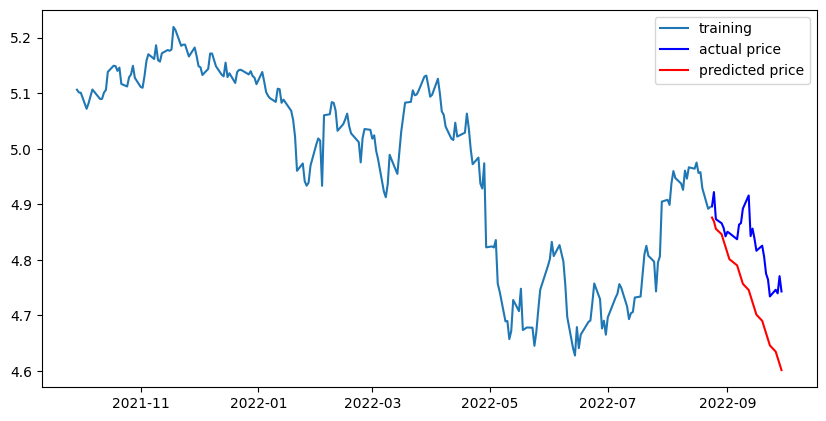

In [80]:
# Amazon Data에 대한 예측
fc3 = fitted_m3.forecast(len(test_data3), alpha=0.05)  # 95% conf
fc3 = np.array(fc3)

# Make as pandas series
fc3_series = pd.Series(fc3, index=test_data3.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data3, label='training')
plt.plot(test_data3, c='b', label='actual price')
plt.plot(fc3_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data1), np.exp(fc1))
mae = mean_absolute_error(np.exp(test_data1), np.exp(fc1))
rmse = math.sqrt(mean_squared_error(np.exp(test_data1), np.exp(fc1)))
mape = np.mean(np.abs(np.exp(fc1) - np.exp(test_data1))/np.abs(np.exp(test_data1)))

print('Apple MSE: ', mse)
print('Apple MAE: ', mae)
print('Apple RMSE:', rmse)
print('Apple MAPE: {:.2f}%'.format(mape*100))

Apple MSE:  1054.8494700112358
Apple MAE:  28.532248992821795
Apple RMSE: 32.478446237639446
Apple MAPE: 18.46%


In [86]:
mse = mean_squared_error(np.exp(test_data2), np.exp(fc2))
mae = mean_absolute_error(np.exp(test_data2), np.exp(fc2))
rmse = math.sqrt(mean_squared_error(np.exp(test_data2), np.exp(fc2)))
mape = np.mean(np.abs(np.exp(fc2) - np.exp(test_data2))/np.abs(np.exp(test_data2)))

print('Google MSE: ', mse)
print('Google MAE: ', mae)
print('Google RMSE:', rmse)
print('Google MAPE: {:.2f}%'.format(mape*100))

Google MSE:  66.6130022924126
Google MAE:  7.258204888654719
Google RMSE: 8.161678889322502
Google MAPE: 6.95%


In [89]:
mse = mean_squared_error(np.exp(test_data3), np.exp(fc3))
mae = mean_absolute_error(np.exp(test_data3), np.exp(fc3))
rmse = math.sqrt(mean_squared_error(np.exp(test_data3), np.exp(fc3)))
mape = np.mean(np.abs(np.exp(fc3) - np.exp(test_data3))/np.abs(np.exp(test_data3)))

print('Amazon MSE: ', mse)
print('Amazon MAE: ', mae)
print('Amazon RMSE:', rmse)
print('Amazon MAPE: {:.2f}%'.format(mape*100))

Amazon MSE:  141.13294120514354
Amazon MAE:  10.592426092329747
Amazon RMSE: 11.879938602751427
Amazon MAPE: 8.53%


## Google과 Amazon의 경우에는 MAPE 값이 만족스럽게 나왔지만 Apple의 경우에는 조정이 필요해 보이므로 d를 1로 설정

In [90]:
model1 = ARIMA(train_data1, order=(1, 1, 0))  
fitted_m1 = model1.fit()

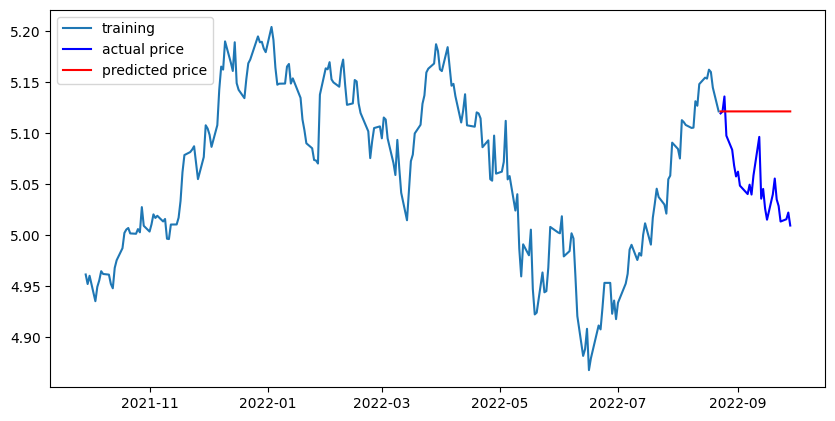

In [91]:
# Apple Data에 대한 예측
fc1 = fitted_m1.forecast(len(test_data1), alpha=0.05)  # 95% conf
fc1 = np.array(fc1)

# Make as pandas series
fc1_series = pd.Series(fc1, index=test_data1.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data1, label='training')
plt.plot(test_data1, c='b', label='actual price')
plt.plot(fc1_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [92]:
mse = mean_squared_error(np.exp(test_data1), np.exp(fc1))
mae = mean_absolute_error(np.exp(test_data1), np.exp(fc1))
rmse = math.sqrt(mean_squared_error(np.exp(test_data1), np.exp(fc1)))
mape = np.mean(np.abs(np.exp(fc1) - np.exp(test_data1))/np.abs(np.exp(test_data1)))

print('Apple MSE: ', mse)
print('Apple MAE: ', mae)
print('Apple RMSE:', rmse)
print('Apple MAPE: {:.2f}%'.format(mape*100))

Apple MSE:  144.49902333041848
Apple MAE:  10.892420467507689
Apple RMSE: 12.020774656003601
Apple MAPE: 7.06%


## Apple의 경우에는 d값을 1로 조정하니 오차율이 훨씬 낮아졌다.